# Import and test plotting census tract data

In [ ]:
import pandas as pd
census_tract_df = pd.read_csv('census_tract_data.csv', header = 0, encoding='latin1')

In [2]:
census_tract_df.columns

Index(['GISJOIN', 'YEAR', 'STUSAB', 'REGIONA', 'DIVISIONA', 'STATE', 'STATEA',
       'COUNTY', 'COUNTYA', 'COUSUBA', 'PLACEA', 'TRACTA', 'BLKGRPA',
       'CONCITA', 'AIANHHA', 'RES_ONLYA', 'TRUSTA', 'AIHHTLI', 'AITSA',
       'ANRCA', 'CBSAA', 'CSAA', 'METDIVA', 'NECTAA', 'CNECTAA', 'NECTADIVA',
       'UAA', 'CDCURRA', 'SLDUA', 'SLDLA', 'ZCTA5A', 'SUBMCDA', 'SDELMA',
       'SDSECA', 'SDUNIA', 'PCI', 'PUMAA', 'GEO_ID', 'BTTRA', 'BTBGA',
       'TL_GEO_ID', 'NAME_E', 'AQNGE001', 'AQNGE002', 'AQNGE003', 'AQNGE004',
       'AQNGE005', 'AQNGE006', 'AQNGE007', 'AQNGE008', 'AQNGE009', 'AQNGE010',
       'NAME_M', 'AQNGM001', 'AQNGM002', 'AQNGM003', 'AQNGM004', 'AQNGM005',
       'AQNGM006', 'AQNGM007', 'AQNGM008', 'AQNGM009', 'AQNGM010'],
      dtype='object')

In [3]:
census_tract_df.drop(['YEAR',
                      'COUSUBA',
                      'PLACEA',
                      'BLKGRPA',
                      'CONCITA',
                      'AIANHHA',
                      'RES_ONLYA',
                      'TRUSTA',
                      'AIHHTLI',
                      'AITSA',
                      'ANRCA',
                      'NECTAA',
                      'CNECTAA',
                      'NECTADIVA',
                      'CDCURRA',
                    'SLDUA',
                    'SLDLA',
                    'ZCTA5A',
                    'SUBMCDA',
                    'SDELMA',
                    'SDSECA',
                    'SDUNIA',
                    'PCI',
                    'PUMAA',
                    'BTBGA'], axis=1, inplace=True)


In [4]:
import geopandas as gpd
gdf = gpd.read_file("US_census_shapefiles/US_tract_2018.shp")

In [5]:
merged_gdf = gdf.merge(census_tract_df, how='left', 
                       left_on='GISJOIN', right_on='GISJOIN')
merged_gdf = merged_gdf.rename(columns={"AQNGE001":    "Total",
           "AQNGE002":    "White alone",
           "AQNGE003":    "Black or African American alone",
           "AQNGE004":    "American Indian and Alaska Native alone",
           "AQNGE005":    "Asian alone",
           "AQNGE006":    "Native Hawaiian and Other Pacific Islander alone",
           "AQNGE007":    "Some Other Race alone",
           "AQNGE008":    "Two or More Races",
           "AQNGE009":    "Two or More Races: Two races including Some Other Race",
           "AQNGE010":    "Two or More Races: Two races excluding Some Other Race, and three or more races"
                   })

In [6]:
merged_gdf.columns

Index(['GISJOIN', 'STATEFP', 'COUNTYFP', 'TRACTCE', 'GEOID', 'NAME',
       'NAMELSAD', 'MTFCC', 'FUNCSTAT', 'ALAND', 'AWATER', 'INTPTLAT',
       'INTPTLON', 'Shape_Leng', 'Shape_Area', 'geometry', 'STUSAB', 'REGIONA',
       'DIVISIONA', 'STATE', 'STATEA', 'COUNTY', 'COUNTYA', 'TRACTA', 'CBSAA',
       'CSAA', 'METDIVA', 'UAA', 'GEO_ID', 'BTTRA', 'TL_GEO_ID', 'NAME_E',
       'Total', 'White alone', 'Black or African American alone',
       'American Indian and Alaska Native alone', 'Asian alone',
       'Native Hawaiian and Other Pacific Islander alone',
       'Some Other Race alone', 'Two or More Races',
       'Two or More Races: Two races including Some Other Race',
       'Two or More Races: Two races excluding Some Other Race, and three or more races',
       'NAME_M', 'AQNGM001', 'AQNGM002', 'AQNGM003', 'AQNGM004', 'AQNGM005',
       'AQNGM006', 'AQNGM007', 'AQNGM008', 'AQNGM009', 'AQNGM010'],
      dtype='object')

In [7]:
merged_gdf['Percent Asian'] = merged_gdf["Asian alone"]/merged_gdf["Total"] * 100

In [8]:
merged_gdf.shape

(73666, 54)

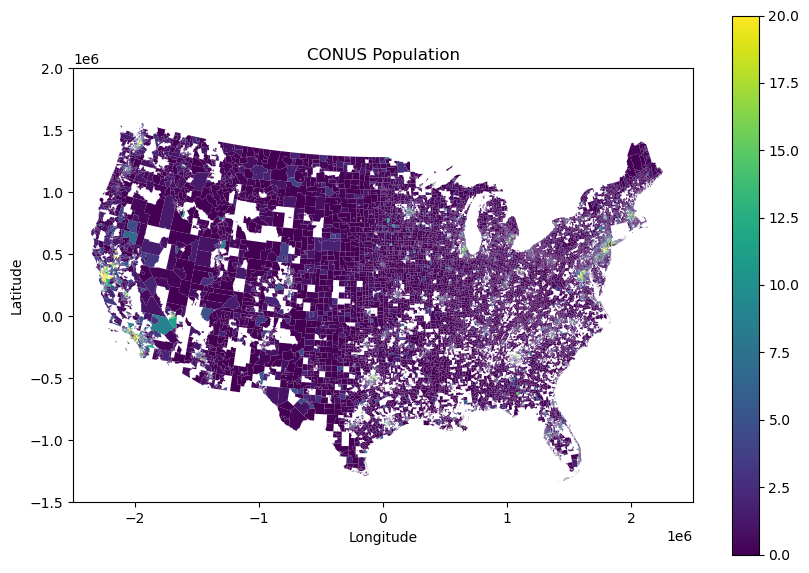

In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(1, 1)
divider = make_axes_locatable(ax)

# Set the colorbar limits here
merged_gdf.plot(column = "Percent Asian", cmap='viridis', legend=True, ax = ax, vmax = 20)

#cbar = plt.colorbar(ax.collections[0], ax=ax, orientation='vertical')
#bar.set_label('Population Estimate')

# Step 4: Customizing plot attributes
plt.title('CONUS Population')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xlim(-2500000, 2500000)  # Set x-axis limits
plt.ylim(-1500000.0, 2000000.0)    # Set y-axis limits
plt.gcf().set_size_inches(10, 7)  # Set figure size (width, height) in inches
plt.show()

# Converted gridded data to census tract resolution

## Import RWC Data and Process PM2.5

In [9]:
import xarray as xr

In [10]:
rwc_2020_new_surg =  xr.open_dataset('2020_new_surrogates_avg.nc')

In [11]:
def add_pm25(dataset):
    # Extract variables representing PM2.5 components
    pm25_components = ['PAL', 'PCA', 'PCL', 'PEC', 'PFE', 'PH2O', 'PK', 'PMG', 'PMN', 'PMOTHR', 'PNA', 'PNCOM', 'PNH4', 'PNO3', 'POC', 'PSI', 'PSO4', 'PTI']
    pm25_concentrations = dataset[pm25_components]

    # Sum up the concentrations along the specified dimensions (if necessary)
    # Access the variables you want to sum
    #PSO4', 'PNO3', 'POC', 'PEC', 'PNH4',
    pm25_total =  pm25_concentrations.variables[pm25_components[0]]
    for component in pm25_components[1:]:
        pm25_total += pm25_concentrations.variables[component]
        
    # Sum the emissions for each grid cell across the variables
    #pm25_total = var1+ var2 + var3 + var4 + var5

    # # Create a new variable for PM2.5 total and assign the calculated values to it
    dataset['PM25_total'] = pm25_total

    # Optionally, you can add attributes to the new variable to provide metadata
    dataset['PM25_total'].attrs['long_name'] = 'PM25_total'
    dataset['PM25_total'].attrs['units'] = 'g/s'
    dataset['PM25_total'].attrs['var_desc'] = 'Total PM2.5 concentration'
    return dataset

In [12]:
rwc_2020_new_surg = add_pm25(rwc_2020_new_surg)


## Convert to geopanda grid
Goal: convert from xarray file with rows and columns to geopandas file with boundaries of 4km grid
1. Convert from rows and columns to latitude and longitude vertices using proj
2. create geopandas dataframe
3. add pm2.5 data

In [13]:
rwc_2020_new_surg.dims

Frozen({'TSTEP': 1, 'VAR': 66, 'DATE-TIME': 2, 'LAY': 1, 'ROW': 726, 'COL': 1155})

In [14]:
import geopandas as gpd
from shapely.geometry import Polygon
import numpy as np

# Projection parameters
proj_params = {'proj': 'lcc',
               'lat_1': 33,
               'lat_2': 45,
               'lon_0': -97,
               'lat_0': 40}

# Coordinates of the origin
xorig = -2292000
yorig = -1584000

# Number of grid cells in x and y directions
num_cells_x = 1155
num_cells_y = 726

# Size of each grid cell (in meters)
cell_size = 4000  # 4km

# Generate grid coordinates using NumPy
x_coords = np.linspace(xorig, xorig + cell_size * num_cells_x, num_cells_x + 1)
y_coords = np.linspace(yorig, yorig + cell_size * num_cells_y, num_cells_y + 1)

# Create vertices for all grid cells using NumPy
x1, y1 = np.meshgrid(x_coords[:-1], y_coords[:-1])
x2, y2 = np.meshgrid(x_coords[1:], y_coords[:-1])
x3, y3 = np.meshgrid(x_coords[1:], y_coords[1:])
x4, y4 = np.meshgrid(x_coords[:-1], y_coords[1:])

# Reshape to 1D arrays
x1, x2, x3, x4 = x1.ravel(), x2.ravel(), x3.ravel(), x4.ravel()
y1, y2, y3, y4 = y1.ravel(), y2.ravel(), y3.ravel(), y4.ravel()

# Create GeoDataFrame with polygons
polygons = [Polygon([(x1[i], y1[i]), (x2[i], y2[i]), (x3[i], y3[i]), (x4[i], y4[i])]) for i in range(len(x1))]
grid_gdf = gpd.GeoDataFrame(geometry=polygons, crs=proj_params)

In [15]:
grid_gdf

,geometry
0,"POLYGON ((-2292000.000 -1584000.000, -2288000...."
1,"POLYGON ((-2288000.000 -1584000.000, -2284000...."
2,"POLYGON ((-2284000.000 -1584000.000, -2280000...."
3,"POLYGON ((-2280000.000 -1584000.000, -2276000...."
4,"POLYGON ((-2276000.000 -1584000.000, -2272000...."
...,...
838525,"POLYGON ((2308000.000 1316000.000, 2312000.000..."
838526,"POLYGON ((2312000.000 1316000.000, 2316000.000..."
838527,"POLYGON ((2316000.000 1316000.000, 2320000.000..."
838528,"POLYGON ((2320000.000 1316000.000, 2324000.000..."


In [16]:
# add rwc data to the grid gdf
rwc_2020_nd = rwc_2020_new_surg['PM25_total'][0,0,:,:].to_numpy() #convert Xarray frame to numpy ndarray
rwc_2020_nd_flat = rwc_2020_nd.ravel() # make 1D to be added to gdf
grid_gdf['PM25'] = rwc_2020_nd_flat # add column to gdf

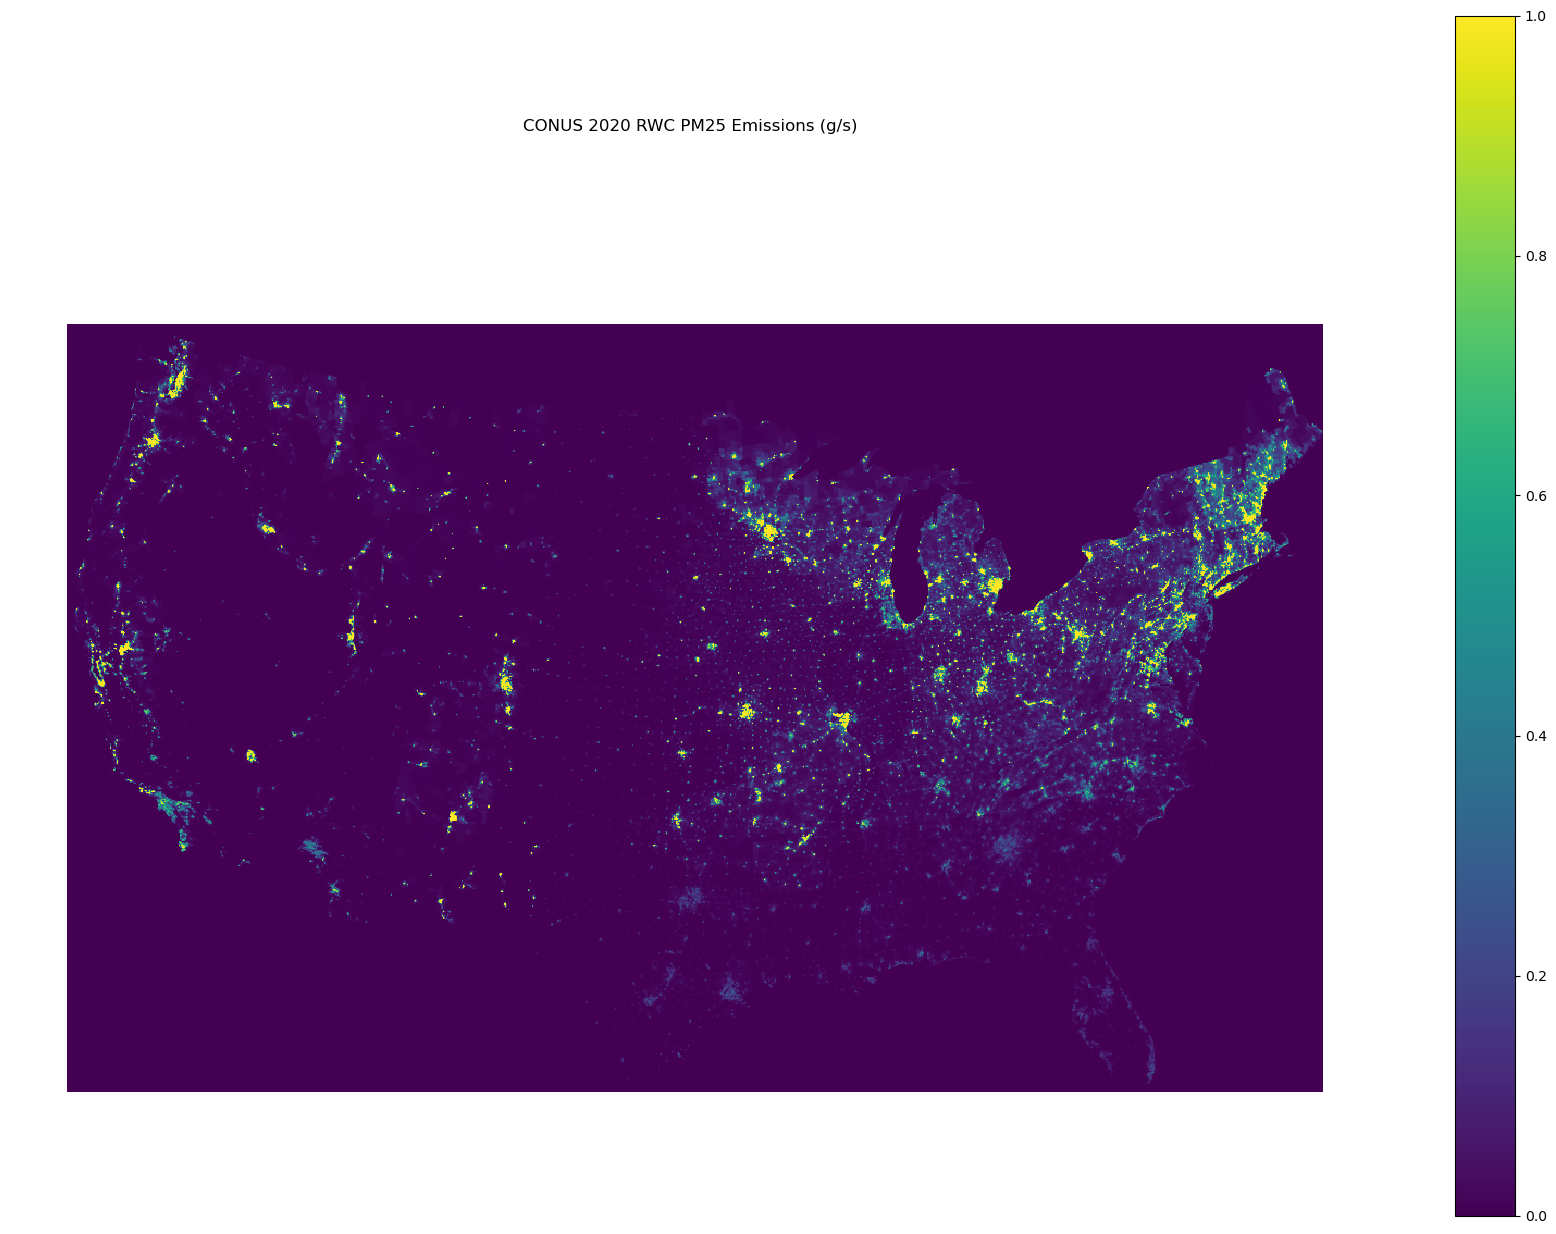

In [18]:
# Plot results to confirm

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Set the colorbar limits here
grid_gdf.plot(column='PM25', cmap='viridis', legend=True, vmax = 1)


plt.title('CONUS 2020 RWC PM25 Emissions (g/s)')
plt.xlim(-2500000, 2500000)  # Set x-axis limits
plt.ylim(-1500000.0, 2000000.0)    # Set y-axis limits
plt.gcf().set_size_inches(17, 12)  # Set figure size (width, height) in inches

# Remove outer border
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.xticks([])
plt.yticks([])
plt.subplots_adjust(left=0, right=1, top=0.2, bottom=0)

plt.show()

## Resampling to census tract resolution

In [34]:
### Make Intersections gdf
# grid_gdf = grid_gdf.reset_index().rename(columns={'index': 'iD'})
# merged_shapes = merged_gdf[['GISJOIN','geometry']]
# intersection = gpd.overlay(grid_gdf, merged_shapes, how='intersection')
# intersection.to_file("intersection.shp")

In [2]:
import geopandas as gpd
merged_gdf = gpd.read_file("merged_gdf/merged_gdf.shp")

In [4]:
merged_gdf.columns

Index(['GISJOIN', 'STATEFP', 'COUNTYFP', 'TRACTCE', 'GEOID', 'NAME',
       'NAMELSAD', 'MTFCC', 'FUNCSTAT', 'ALAND', 'AWATER', 'INTPTLAT',
       'INTPTLON', 'Shape_Leng', 'Shape_Area', 'STUSAB', 'REGIONA',
       'DIVISIONA', 'STATE', 'STATEA', 'COUNTY', 'COUNTYA', 'TRACTA', 'CBSAA',
       'CSAA', 'METDIVA', 'UAA', 'GEO_ID', 'BTTRA', 'TL_GEO_ID', 'NAME_E',
       'Total', 'White alon', 'Black or A', 'American I', 'Asian alon',
       'Native Haw', 'Some Other', 'Two or Mor', 'Two or M_1', 'Two or M_2',
       'NAME_M', 'AQNGM001', 'AQNGM002', 'AQNGM003', 'AQNGM004', 'AQNGM005',
       'AQNGM006', 'AQNGM007', 'AQNGM008', 'AQNGM009', 'AQNGM010',
       'Percent As', 'geometry'],
      dtype='object')

In [1]:
import geopandas as gpd

#get census tract gdf
merged_gdf = gpd.read_file("merged_gdf/merged_gdf.shp")
merged_gdf = merged_gdf.to_crs(grid_gdf.crs) # convert to the same SMOKE CRS projection 

#get grid gdf
grid_gdf = gpd.read_file("grid_gdf/grid_gdf.shp")
grid_gdf = grid_gdf.reset_index().rename(columns={'index': 'iD'}) #add indices

In [58]:
# intersecting polygons shapefile
intersection = gpd.read_file("intersections/intersection.shp")

# get pm values distributed to intersecting polygons
intersection['fraction'] = intersection.geometry.area/(4000 ** 2)
intersection['emissions_per_polygon'] = intersection['PM25'] * intersection['fraction']
summed_df = intersection.groupby('GISJOIN')["emissions_per_polygon"].sum().reset_index()

In [62]:
# Merge the two dataframes based on the Index_Column
merged_gdf = merged_gdf.merge(summed_df, on='GISJOIN')

In [69]:
merged_gdf['emissions_per_area'] = merged_gdf['emissions_per_polygon']/merged_gdf.geometry.area * 1000000

In [75]:
merged_gdf.to_file("2020_rwc_census_tract_pm25.shp")

/tmp/ipykernel_197663/1869431183.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  merged_gdf.to_file("2020_rwc_census_tract_pm25.shp")


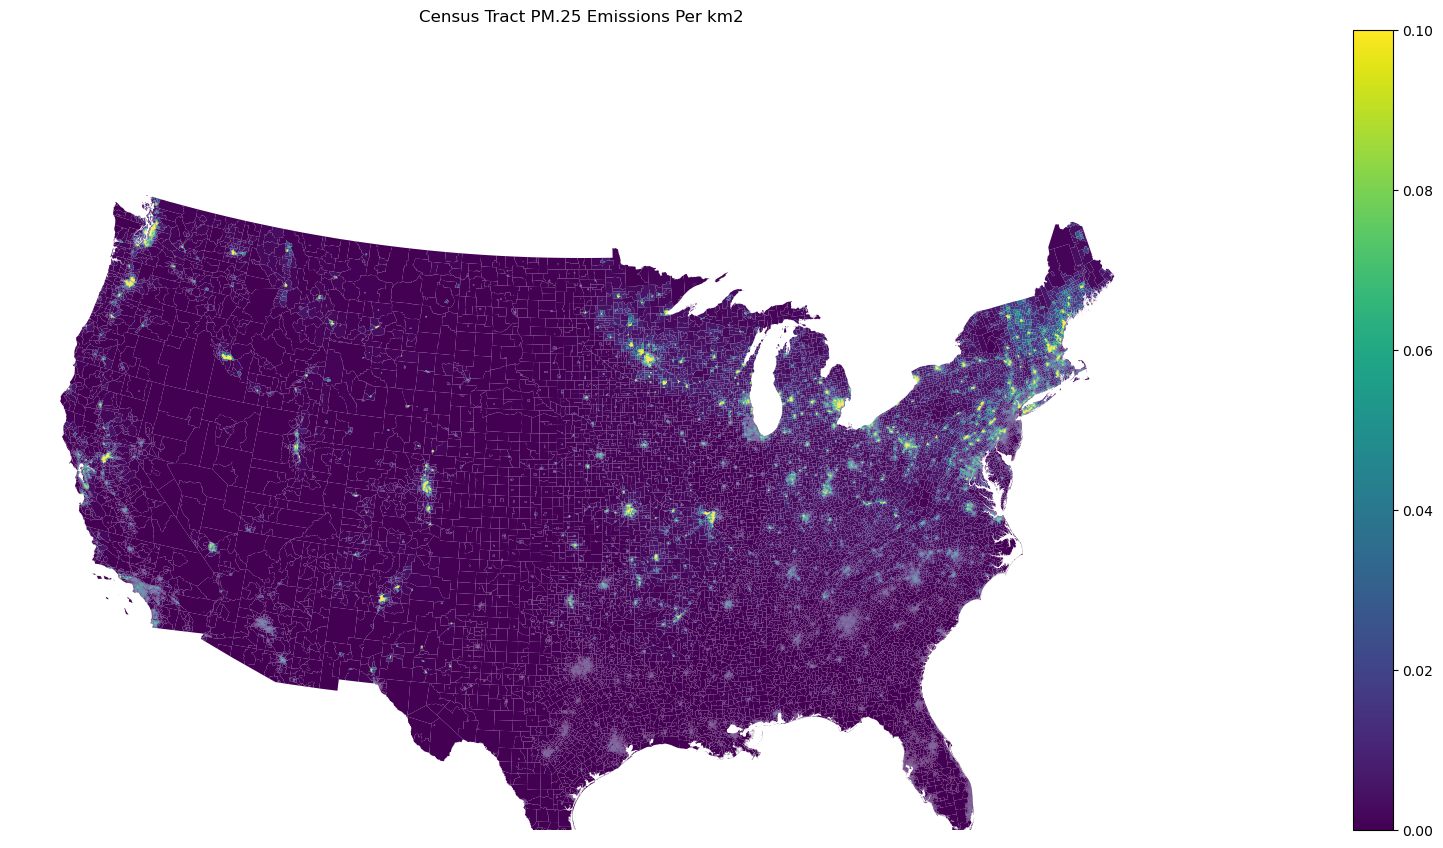

In [74]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Set the colorbar limits here
merged_gdf.plot(column = "emissions_per_area", cmap='viridis', legend=True, vmax = 0.1)

plt.title('Census Tract PM.25 Emissions Per km2')
plt.xlim(-2500000, 2500000)  # Set x-axis limits
plt.ylim(-1500000.0, 2000000.0)    # Set y-axis limits
plt.gcf().set_size_inches(40, 40)  # Set figure size (width, height) in inches

# Remove outer border
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.xticks([])
plt.yticks([])
plt.subplots_adjust(left=0, right=1, top=0.2, bottom=0)

plt.show()

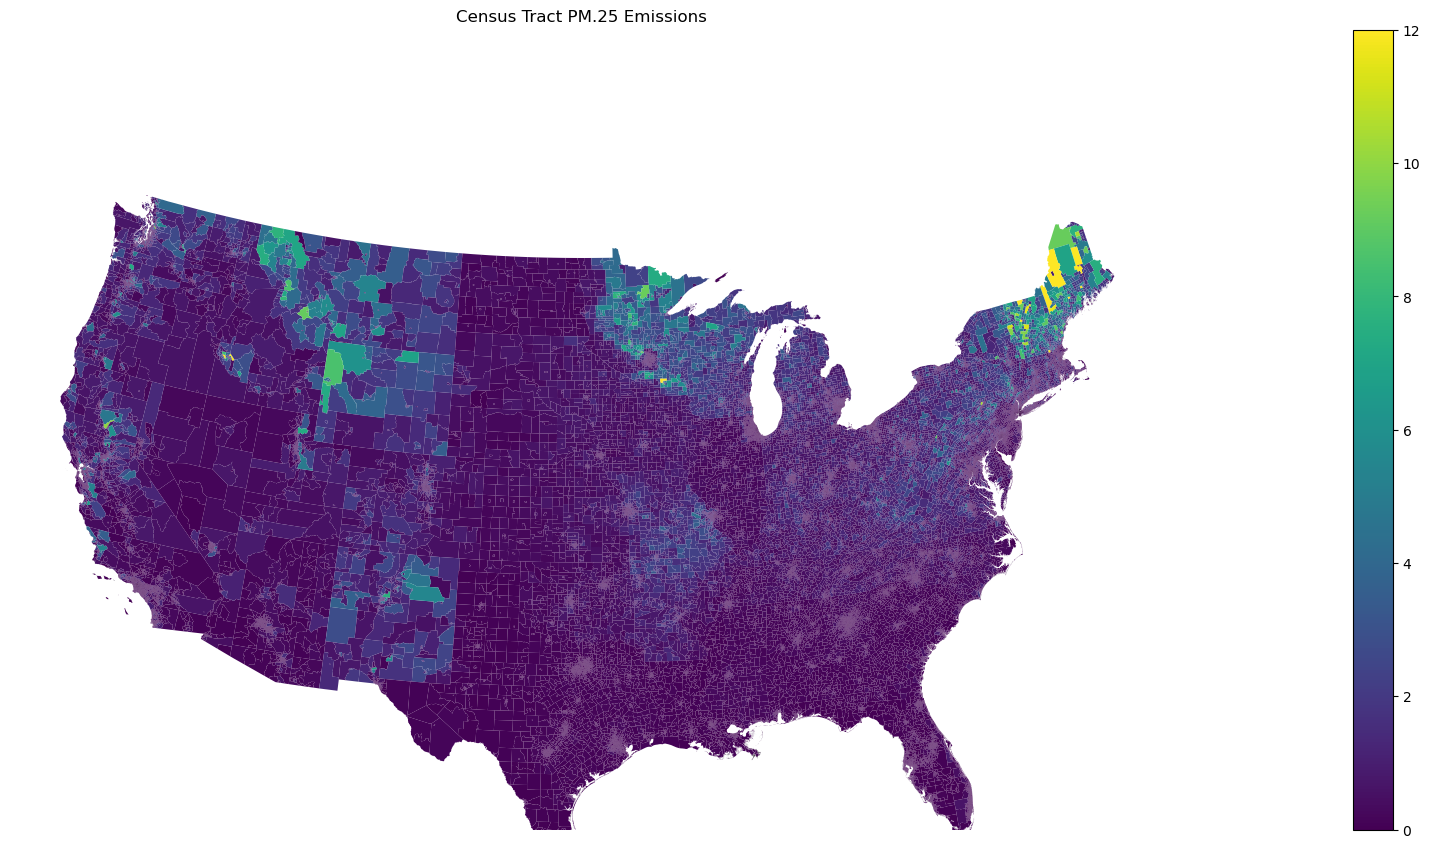

In [57]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Set the colorbar limits here
merged_gdf.plot(column = "emissions_per_polygon", cmap='viridis', legend=True, vmax = 12)

plt.title('Census Tract PM.25 Emissions')
plt.xlim(-2500000, 2500000)  # Set x-axis limits
plt.ylim(-1500000.0, 2000000.0)    # Set y-axis limits
plt.gcf().set_size_inches(40, 40)  # Set figure size (width, height) in inches

# Remove outer border
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.xticks([])
plt.yticks([])
plt.subplots_adjust(left=0, right=1, top=0.2, bottom=0)

plt.show()

## Standalone resampling function

In [ ]:
def output_to_gpd(dataset, variable= "PM25_total", xorig = -2292000, yorig = -1584000, num_cells_x = 1155, \
                  num_cells_y = 726, cell_size = 4000):

    import geopandas as gpd
    from shapely.geometry import Polygon
    import numpy as np

    # Projection parameters
    proj_params = {'proj': 'lcc',
                   'lat_1': 33,
                   'lat_2': 45,
                   'lon_0': -97,
                   'lat_0': 40}

    # Generate grid coordinates using NumPy
    x_coords = np.linspace(xorig, xorig + cell_size * num_cells_x, num_cells_x + 1)
    y_coords = np.linspace(yorig, yorig + cell_size * num_cells_y, num_cells_y + 1)

    # Create vertices for all grid cells using NumPy
    x1, y1 = np.meshgrid(x_coords[:-1], y_coords[:-1])
    x2, y2 = np.meshgrid(x_coords[1:], y_coords[:-1])
    x3, y3 = np.meshgrid(x_coords[1:], y_coords[1:])
    x4, y4 = np.meshgrid(x_coords[:-1], y_coords[1:])

    # Reshape to 1D arrays
    x1, x2, x3, x4 = x1.ravel(), x2.ravel(), x3.ravel(), x4.ravel()
    y1, y2, y3, y4 = y1.ravel(), y2.ravel(), y3.ravel(), y4.ravel()

    # Create GeoDataFrame with polygons
    polygons = [Polygon([(x1[i], y1[i]), (x2[i], y2[i]), (x3[i], y3[i]), (x4[i], y4[i])]) for i in range(len(x1))]
    grid_gdf = gpd.GeoDataFrame(geometry=polygons, crs=proj_params)
    
    # add rwc data to the grid gdf
    dataset_nd = dataset[variable][0,0,:,:].to_numpy() #convert Xarray frame to numpy ndarray
    dataset_nd_flat = dataset_nd.ravel() # make 1D to be added to gdf
    grid_gdf[variable] = dataset_nd_flat # add column to gdf

    grid_gdf = grid_gdf.reset_index().rename(columns={'index': 'iD'}) #add indices


    def census_tract_emissions(grid_gdf)
        import geopandas as gpd
        merged_gdf = gpd.read_file("merged_gdf/merged_gdf.shp")

        # convert to the same SMOKE CRS projection 
        merged_gdf = merged_gdf.to_crs(grid_gdf.crs)
        
        merged_shapes = merged_gdf[['GISJOIN','geometry']]
        intersection = gpd.overlay(grid_gdf, merged_shapes, how='intersection')
        
        # get values distributed to intersecting polygons
        intersection['fraction'] = intersection.geometry.area/(cell_size ** 2)
        intersection['weighted_value'] = intersection[variable] * intersection['fraction']
        summed_df = intersection.groupby('GISJOIN')["weighted_value"].sum().reset_index()
        
        return summed_df
    
    return census_tract_emissions(grid_gdf)

# Population Data Science

In [ ]:
import geopandas as gpd
rwc_census_tract_pm25 = gpd.read_file('census_tract_data/2016_rwc_census_tract_pm25.shp')

rwc_census_tract_pm25 = rwc_census_tract_pm25.rename(columns={
           "White alon":    "White",
           "Black or A":    "Black",
           "American I":    "American Indian",
           "Asian alon":    "Asian",
           "Native Haw":    "Native Hawaiian or Pacific Islander",
           'Some Other': 'Other', 
           'Two or Mor': 'Two or More Races',
           'Hispanic o': 'Hispanic'
                   })

In [77]:
import geopandas as gpd
rwc_census_tract_pm25 = gpd.read_file('2020_rwc_census_tract_pm25/2020_rwc_census_tract_pm25.shp')

In [125]:
rwc_census_tract_pm25.dropna(subset=['Total'], inplace=True)


In [128]:
rwc_census_tract_pm25.columns

Index(['GISJOIN', 'STATEFP', 'COUNTYFP', 'TRACTCE', 'GEOID', 'NAME',
       'NAMELSAD', 'MTFCC', 'FUNCSTAT', 'ALAND', 'AWATER', 'INTPTLAT',
       'INTPTLON', 'Shape_Leng', 'Shape_Area', 'STUSAB', 'REGIONA',
       'DIVISIONA', 'STATE', 'STATEA', 'COUNTY', 'COUNTYA', 'TRACTA', 'CBSAA',
       'CSAA', 'METDIVA', 'UAA', 'GEO_ID', 'BTTRA', 'TL_GEO_ID', 'NAME_E',
       'Total', 'White', 'Black', 'Native American', 'Asian',
       'Hawaiian or Pacific Islander', 'Some Other', 'Two or Mor',
       'Two or M_1', 'Two or M_2', 'NAME_M', 'AQNGM001', 'AQNGM002',
       'AQNGM003', 'AQNGM004', 'AQNGM005', 'AQNGM006', 'AQNGM007', 'AQNGM008',
       'AQNGM009', 'AQNGM010', 'Percent As', 'emissions_', 'emission_1',
       'geometry', 'pm25_decile', 'White_percentage', 'Black_percentage',
       'Native American_percentage', 'Asian_percentage',
       'Hawaiian or Pacific Islander_percentage'],
      dtype='object')

In [126]:
rwc_census_tract_pm25 = rwc_census_tract_pm25.rename(columns={
           "White alon":    "White",
           "Black or A":    "Black",
           "American I":    "Native American",
           "Asian alon":    "Asian",
           "Native Haw":    "Hawaiian or Pacific Islander"
                   })

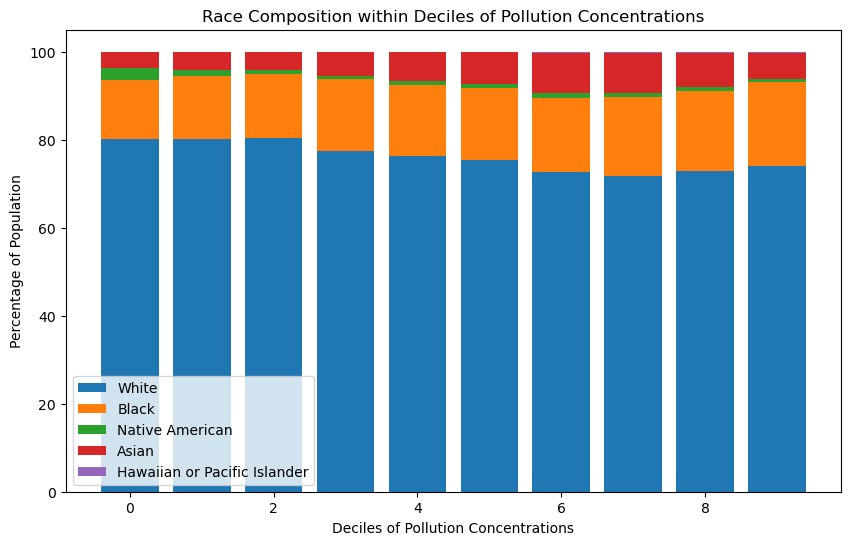

In [136]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#
num_iles = 10

# Calculate deciles of pollution concentrations
rwc_census_tract_pm25['pm25_decile'] = pd.qcut(rwc_census_tract_pm25['emission_1'], q=num_iles, labels=False)

# Calculate the percentage of each race within each decile
race_columns = ["White", "Black", "Native American", "Asian", "Hawaiian or Pacific Islander"]  # Assuming these are the columns representing race

for race in race_columns:
    rwc_census_tract_pm25[race + '_percentage'] = (rwc_census_tract_pm25[race] / (rwc_census_tract_pm25['Total']+0.000001)) * 100

rwc_census_tract_pm25['modified_total'] = \
rwc_census_tract_pm25['White_percentage'] + \
rwc_census_tract_pm25['Black_percentage'] + \
rwc_census_tract_pm25['Native American_percentage'] + \
rwc_census_tract_pm25['Asian_percentage'] + \
rwc_census_tract_pm25['Hawaiian or Pacific Islander_percentage']

for race in race_columns:    
    rwc_census_tract_pm25[race + '_percentage'] *= 100/rwc_census_tract_pm25['modified_total']
    
#Create a bar plot with each bar representing a decile and colored by race percentages
plt.figure(figsize=(10, 6))
bottom = np.zeros(len(rwc_census_tract_pm25['pm25_decile'].unique()))

for i, race in enumerate(race_columns):
    race_percentages = [rwc_census_tract_pm25[rwc_census_tract_pm25['pm25_decile'] == decile][race + '_percentage'].mean() for decile in range(num_iles)]
    plt.bar(range(num_iles), race_percentages, bottom=bottom, label=race)
    bottom += np.array(race_percentages)
plt.xlabel('Deciles of Pollution Concentrations')
plt.ylabel('Percentage of Population')
plt.title('Race Composition within Deciles of Pollution Concentrations')
plt.legend()
plt.show()

In [120]:
 rwc_census_tract_pm25['Total']

0        1865.0
1        1861.0
2        3492.0
3        3987.0
4           NaN
          ...  
72258    3028.0
72259    2323.0
72260    2374.0
72261    3275.0
72262    3595.0
Name: Total, Length: 72263, dtype: float64

In [114]:
rwc_census_tract_pm25.index

RangeIndex(start=0, stop=72263, step=1)

In [86]:
merged_gdf.columns

Index(['GISJOIN', 'STATEFP', 'COUNTYFP', 'TRACTCE', 'GEOID', 'NAME',
       'NAMELSAD', 'MTFCC', 'FUNCSTAT', 'ALAND', 'AWATER', 'INTPTLAT',
       'INTPTLON', 'Shape_Leng', 'Shape_Area', 'STUSAB', 'REGIONA',
       'DIVISIONA', 'STATE', 'STATEA', 'COUNTY', 'COUNTYA', 'TRACTA', 'CBSAA',
       'CSAA', 'METDIVA', 'UAA', 'GEO_ID', 'BTTRA', 'TL_GEO_ID', 'NAME_E',
       'Total', 'White alon', 'Black or A', 'American I', 'Asian alon',
       'Native Haw', 'Some Other', 'Two or Mor', 'Two or M_1', 'Two or M_2',
       'NAME_M', 'AQNGM001', 'AQNGM002', 'AQNGM003', 'AQNGM004', 'AQNGM005',
       'AQNGM006', 'AQNGM007', 'AQNGM008', 'AQNGM009', 'AQNGM010',
       'Percent As', 'geometry', 'emissions_per_polygon',
       'emissions_per_area'],
      dtype='object')